# AI4GSD Demo
------------------------------------------
## Smartphone photos
------------------------------------------
#### Table of contents
#### 0. Installing requried packages (please restart the kernel after installation)
#### 1. Importing required packages
#### 2. Defining working directory
#### 3. Extracting or copying your videos/photos to desired folder
#### 4. Obtaining scales from AI, drone flight data, or manual measurements
#### 5. Obtaining segmentation of anthropogenic objects
#### 6. Obtaining grain size data
#### 7. Applying quality control

##### *** Please contact Yunxiang Chen, yunxiang.chen@pnnl.gov for reporting errors

------------------------------------------
### 0. Installing requried packages (please restart the kernel after installation)

In [1]:
#!pip install --user natsort
#!pip install --user ismember

### 1. Importing required packages

In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import AI4GSD

### 2. Defining working directory

In [3]:
WorkDir = os.path.dirname(os.getcwd())
foldername = '20250517_YC_SmartphoneParkTest'                              # Parent folder where you save photos/videos.
PhotoDir = WorkDir + os.sep + 'Demo_Data' + os.sep + foldername           

### 3. Extracting or copying your videos/photos to desired folder

In [4]:
AI4GSD.getPhotos(PhotoDir,nframe=2000, overwrite=False)                    # Use once.

Corrected orientation for: IMG_9581.JPG
Corrected orientation for: IMG_9582.JPG
Corrected orientation for: IMG_9583.JPG
Corrected orientation for: IMG_9584.JPG
Corrected orientation for: IMG_9585.JPG



### 4. Obtaining scales from AI, drone flight data, or manual measurements

In [5]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.OverWriteAll = True                                                     # Overwrite everything if True.
PP.Directory = PhotoDir
PP.OverWriteScaleFile = False
PP.OverWriteScaleRows = True
PP.ScaleSource = 'AI'                                                      # Use AI option.
PP.ModelName = 'YOLO11m.1280.20250825'                                     # Which AI to use.
PP.ComputingSource = 'local'                                               # What computing resource to use.
PP.ImageSizeFactor = 1                                                     # Do you need to user a larger image size for inference?
PP.ConfidenceThreshold = 0.85                                              # Minimum confidence threshold.
PP.YOLOSave = False                                                        # Need to save AI prediction to folder.
scales =  AI4GSD.metadata(PP)

Generating scale file for: 20250517_YC_SmartphoneParkTest
Estimating photo resolution via local AI model: YOLO11m.1280.20250825
Model layer: 113, model parmeter: 20.06M, submodule number: 409
1/5: photo 1/5, IMG_9581.JPG, scale greencap, res 0.21 mm/px, status 200, (20.00%), 1.63 s
2/5: photo 2/5, IMG_9582.JPG, scale greencap, res 0.49 mm/px, status 200, (40.00%), 0.64 s
3/5: photo 3/5, IMG_9583.JPG, scale greencap, res 0.05 mm/px, status 200, (60.00%), 0.73 s
4/5: photo 4/5, IMG_9584.JPG, scale greencap, res 0.25 mm/px, status 200, (80.00%), 0.74 s
5/5: photo 5/5, IMG_9585.JPG, scale greencap, res 0.46 mm/px, status 200, (100.00%), 0.69 s
Total time: 5.79 s, time per photo 1.16 s
-----------------------------------------------------------------



### 5. Obtaining segmentation of anthropogenic objects

In [6]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.FolderLevel = 'L1'
PP.ModelName = 'YOLO11m.640.20250906'
PP.ObjectName = 'anthro'
PP.OverWriteSegementation = False
PP.YOLOSave = False
PP.YOLOIOU = 0.45
PP.ComputingSource = 'local'
PP.ImageSizeType = 'default'
PP.ImageSizeFactor=1
PP.SegmentationClassName = ['board','redbag','people']                     # What object class need to track.
AI4GSD.background(PP)

-----------------------------------------------------------------
Folder name: 20250517_YC_SmartphoneParkTest
output name: segments
Model name: YOLO11m.640.20250906 from local for anthro
Model layer: 125, model parmeter: 22.37M, submodule number: 445
IOU: 0.45, user confidence: 0.35
Number of photos: 5, number of exluded photos 0
20250517_YC_SmartphoneParkTest: 1/5: IMG_9581.JPG (20.00%)
20250517_YC_SmartphoneParkTest: 2/5: IMG_9582.JPG (40.00%)
20250517_YC_SmartphoneParkTest: 3/5, IMG_9583.JPG, no objects (60.00%)
20250517_YC_SmartphoneParkTest: 4/5: IMG_9584.JPG (80.00%)
20250517_YC_SmartphoneParkTest: 5/5: IMG_9585.JPG (100.00%)
Total time: 2.54 s, time per photo 0.51 s
-----------------------------------------------------------------



### 6. Obtaining grain size data

AI4GSD: an AI and cloud powered tool for grain size quantification
AI models in use: YOLO11m.1280.20250322
Confidence thresholds in use: 0.35

-----------------------------------------------------------------
Folder name: 20250517_YC_SmartphoneParkTest
Output folder: 20250517_YC_SmartphoneParkTest_YOLO11m.1280.20250322_35
Model name: YOLO11m.1280.20250322 from local for rock detection
Model layer: 113, model parmeter: 20.05M, submodule number: 409
IOU: 0.45, YOLO confidence: 0.25, user confidence: 0.35
Number of photos: 5, number of exluded photos 0
1/5: IMG_9581.JPG, resolution 0.21 mm/px (20.00%), 0.00 s
Detected 3745 rocks, diagonal and count based D10, D50, D60, and D84 are: 0.98, 1.53, 1.67, and 2.21 cm
Detected 3745 rocks, diagonal and area  based D10, D50, D60, and D84 are: 1.25, 2.01, 2.20, and 2.89 cm


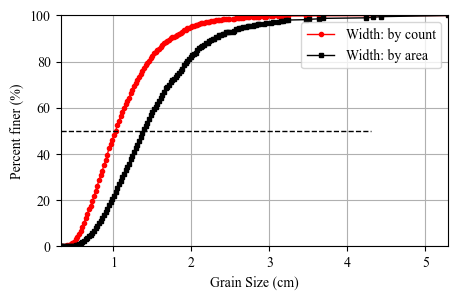

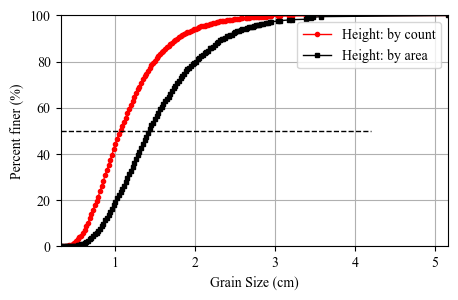

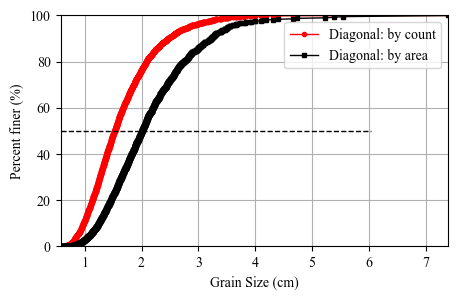

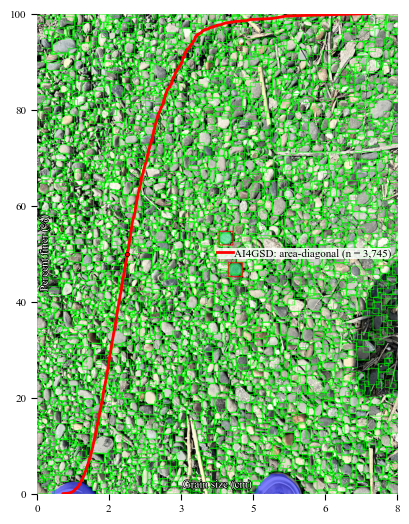

2/5: IMG_9582.JPG, resolution 0.49 mm/px (40.00%), 4.85 s
Detected 5398 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.62, 2.20, 2.36, and 2.90 cm
Detected 5398 rocks, diagonal and area  based D10, D50, D60, and D84 are: 1.82, 2.56, 2.75, and 3.44 cm


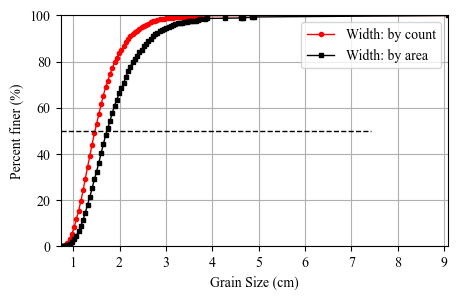

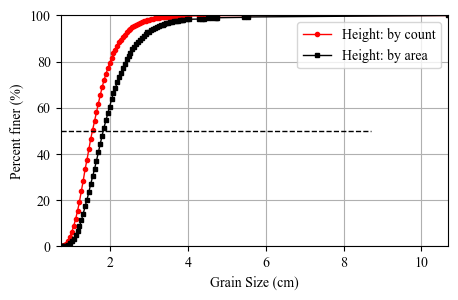

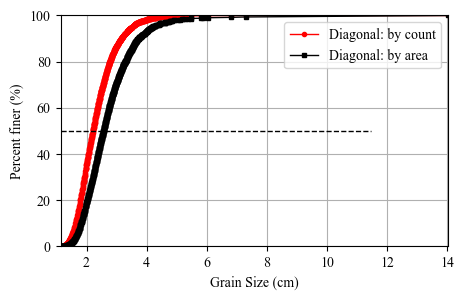

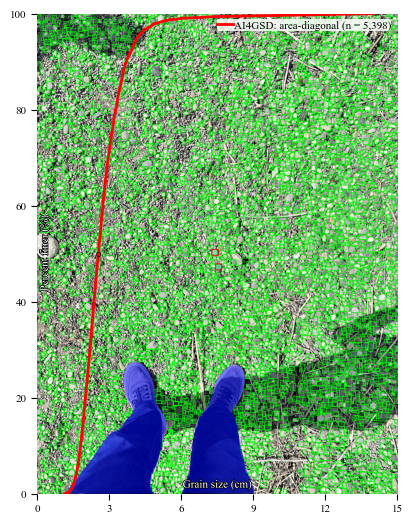

3/5: IMG_9583.JPG, resolution 0.05 mm/px (60.00%), 5.11 s
Detected 452 rocks, diagonal and count based D10, D50, D60, and D84 are: 0.56, 1.13, 1.25, and 1.63 cm
Detected 452 rocks, diagonal and area  based D10, D50, D60, and D84 are: 0.93, 1.55, 1.71, and 2.45 cm


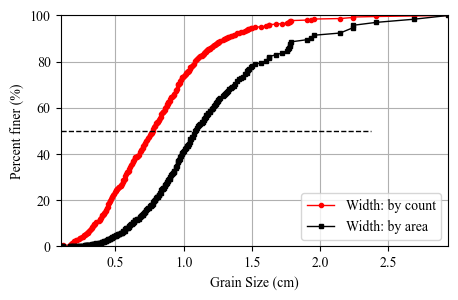

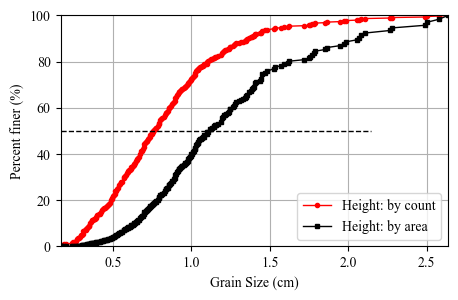

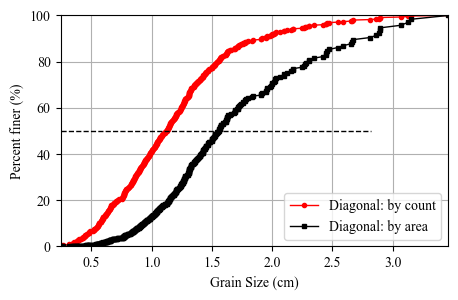

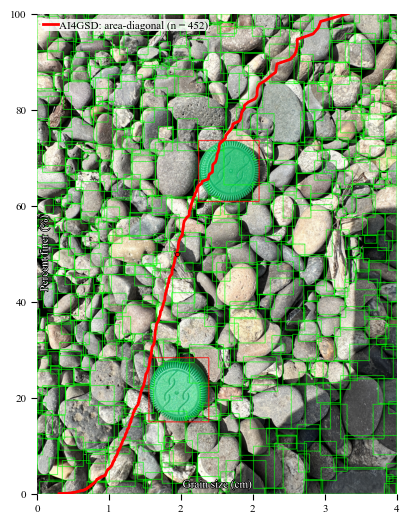

4/5: IMG_9584.JPG, resolution 0.25 mm/px (80.00%), 4.10 s
Detected 4166 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.03, 1.53, 1.67, and 2.18 cm
Detected 4166 rocks, diagonal and area  based D10, D50, D60, and D84 are: 1.27, 1.96, 2.16, and 2.90 cm


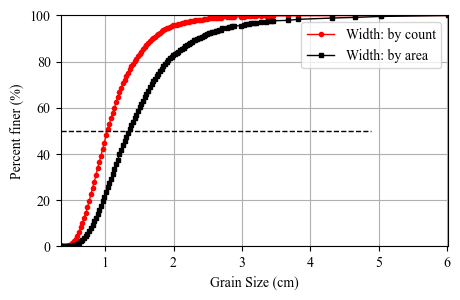

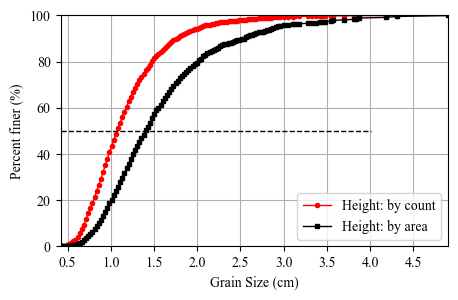

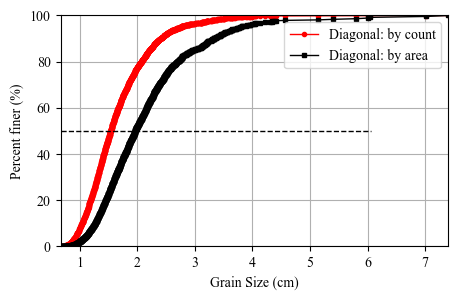

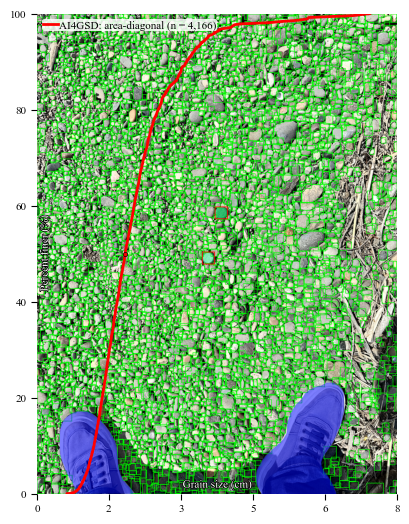

5/5: IMG_9585.JPG, resolution 0.46 mm/px (100.00%), 4.73 s
Detected 5393 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.57, 2.14, 2.29, and 2.83 cm
Detected 5393 rocks, diagonal and area  based D10, D50, D60, and D84 are: 1.77, 2.53, 2.74, and 3.61 cm


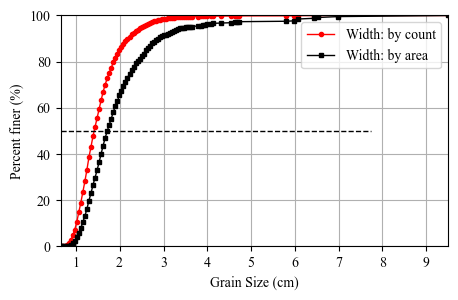

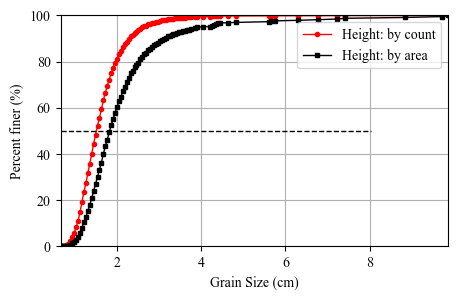

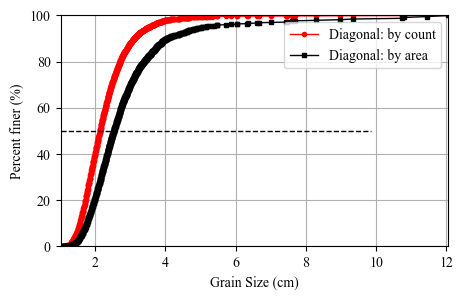

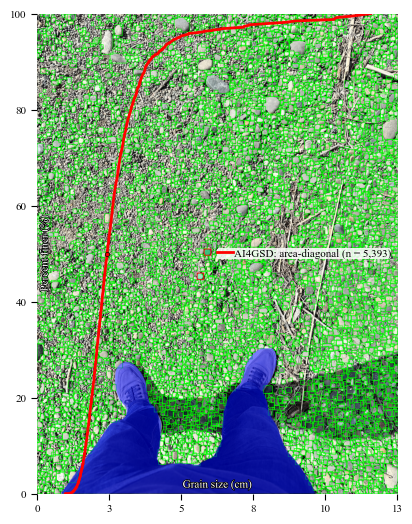

Output folder summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250517_YC_SmartphoneParkTest/grains_predicts/20250517_YC_SmartphoneParkTest_YOLO11m.1280.20250322_35/Statistics_V3_20250517_YC_SmartphoneParkTest_YOLO11m.1280.20250322_35.csv
Total number of grains: 19154, number of grains per photo: 3830.80
Total time: 23.76 s, time per photo 4.75 s

Output all summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250517_YC_SmartphoneParkTest/Statistics_V3_20250517_YC_SmartphoneParkTest_YOLO11m.1280.20250322_35.csv
Total execution time: 23.77 s


In [7]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.ModelName = 'YOLO11m.1280.20250322'
PP.ImageSizeFactor = 1
PP.LineThickness = 2
PP.YOLOSave = False
PP.SaveOverlayLabel = False
PP.OverWriteAll = True                                                  
PP.PrintOnScreen = True  
PP.OverlayFontSize = 4
PP.OverlayLegendFontSize = 4
PP.OverlayGSDTickLineWidth = 4
gsd = AI4GSD.Photo2GSD(PP)

### 7. Applying quality control

In [8]:
gsdqc, stqc = AI4GSD.qualityControl(PhotoDir)


Quality control summary for 20250517_YC_SmartphoneParkTest:
Photos: time 31.0 s, area 6.8 m2, valid area 6.8 m2 (100.0%), frame 5, valid frame 5 (100.0%)
Photos: grain number 19154, number per image 3830.8; efficiency 0.2 m2/s, 617.9 grains/s
